# Lab2 回归模型
- 姓名：彭钰钊
- 学号：2110756
- 专业：计算机科学与技术
- GitHub链接：https://github.com/Yuzhao-P/Machine-Learning
    > 上传历次实验数据文件和.ipynb文件，同时在README.md中更新有关实验的相关知识整理。
## 实验要求
### 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
2. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。


### 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

***截止日期：10月22日***

- 以学号+姓名(2)的命名形式打包实验代码+实验报告发送到邮箱18329300691@163.com
- 推荐使用.ipynb文件格式

## 知识点回顾
### 线性回归概述
回归是监督学习的一个子问题，用于预测**输入变量**和**输出变量**之间的关系，回归模型是一种是对连续值的预测映射函数，而线性回归模型(Linear Regression)算是其中一个十分经典的存在。那么什么是线性函数？如下图所示：

![a.png](https://s2.loli.net/2022/10/04/rdm5WLI84BNznUR.png)

### 预测模型
- 特征 (features): $x_i$, 比如红酒的固定酸度、挥发性酸度，红酒的柠檬酸含量、pH值，红酒的酒精含量等都是它的特征
- 特征向量 (输入): $x$, 若干个特征组成的向量，代表一中红酒的所有信息。例如，$x^{(i)}_j$ 表示第 $i$ 中红酒的第 $j$ 个特征
- 输出向量 $y$, $y^{(i)}$ 表示第 $i$ 个输入对应的输出
- 假设 (hypothesis): 也称预测函数，比如一个线性的预测函数是：
$$h_\theta (x)=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n=\theta^T x$$
上述的表达式就是**回归方程 (regression equation)**, $\theta$ 就是回归系数，关系到我们预测的准确程度。

### 导入所需要的包

In [1]:
# 导入本次实验所需要的包
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# 读取数据集文件
data = pd.read_csv("winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


最后一列是质量的评级，即标签，前面其他的都是酒的特征。

## 基本要求
### 数据预处理
在线性回归问题中，通常会采用**中心化**（Centering）和**标准化**（Standardization）这两种方式来进行数据预处理，具体步骤如下：

1. **中心化（Centering）**：中心化的操作是通过减去数据特征的均值，将数据的中心移动到原点。这意味着所有特征的均值将变为0。这一步的主要目的是消除特征之间的偏差，使模型更容易训练，同时保持特征的尺度不变。中心化的公式如下：
   
   对于单个特征 $x_i$：
   $$x_i' = x_i - \bar{x}$$
   其中，$x_i'$ 是中心化后的特征，$x_i$ 是原始特征，$\bar{x}$ 是特征 $x_i$ 的均值。

2. **标准化（Standardization）**：标准化是将中心化后的数据特征按照标准差进行缩放，使它们的标准差变为1。这有助于确保特征具有相似的尺度，进一步提高线性回归模型的训练效率。标准化的公式如下：
   
   对于单个特征 $x_i'$：
   $$x_i'' = \frac{x_i'}{\sigma}$$
   其中，$x_i''$ 是标准化后的特征，$x_i'$ 是中心化后的特征，$\sigma$ 是特征 $x_i'$ 的标准差。

中心化和标准化可以提高线性回归模型的训练收敛速度，并有助于模型更好地拟合数据。

In [3]:
# 标准化函数代码
def Standardization_fun(x):
    # 特征零均值处理——中心化
    x = x - np.mean(x, 0)
    # 现在的 x 就是中心化后的 x'
    # 依照标准差缩放——标准化
    x = x / np.std(x, 0)
    return x

In [4]:
# 数据集划分
def split_dataset(features, label, train_ratio=0.8, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)

    # 辅助索引
    train_index = []
    test_index = []
    # 依照标签类别分类——{label:[该标签索引的列表]}
    label_index_dic = {}
    for i in range(len(label)):
        # 标签类别值，即quality的值
        label_val = label[i]
        # 将label_val的索引放入字典中的列表内
        if label_val not in label_index_dic.keys():
            label_index_dic[label_val] = []
        label_index_dic[label_val].append(i)
    # （训练集）采样数=train_ratio*样本数，默认为4：1划分，注意取整--int强制转化；在每个标签类别中均如此
    # 分层抽样——保持数据分布的一致性，保持样本类别比例相似
    for key_label_val, label_index_list in label_index_dic.items():
        sample_amount = int(train_ratio*len(label_index_list))  # 在每个标签类别中的采样数
        sample_list = random.sample(label_index_list, sample_amount)  # 根据采样数随机在索引的列表选取，获得训练集的索引
        train_index.extend(sample_list)
    # 数据集 = 训练集 + 测试集，现在已知训练集索引，那么测试集索引不就显而易见了么
    test_index = list(set(range(len(label))) - set(train_index))

    # 随机打乱数据
    # 这是pandas--DataFrame数据类型的使用方法
    # train_index = train_index.sample(frac=1).reset_index(drop=True)
    # test_index = test_index.sample(frac=1).reset_index(drop=True)
    # 我们现在是list
    random.shuffle(train_index)
    random.shuffle(test_index)

    # X -- 特征数据；y -- 标签
    # 前面我们获得的都是数据的索引，现在我们要真正获得数据——根据索引还原数据
    train_X = [features[i] for i in train_index]
    train_y = [label[i] for i in train_index]
    test_X = [features[i] for i in test_index]
    test_y = [label[i] for i in test_index]
    
    return np.array(train_X), np.array(train_y), np.array(test_X), np.array(test_y)

In [5]:
# 数据预处理函数封装
def data_preprocessing_fun(data):
    # 提取特征和标签
    X = np.array(data.drop(columns=["quality"]))  # 提取特征数据，即除了标签以外的数据
    y = np.array(data["quality"])  # 提取标签数据
    # 中心化
    X = Standardization_fun(X)
    # 引用自实验说明——回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X左侧添加全为1的一列
    # 注意数据类型的不同，因此做出如下修改
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    train_X , train_y, test_X, test_y = split_dataset(X, y, random_seed=38)
    return train_X , train_y, test_X, test_y

接下来我们检查一下数据集是否正确按照4：1划分为训练集和测试集，首先检查整体比例：

In [6]:
# 检验数据处理是否正确
train_X , train_y, test_X, test_y = data_preprocessing_fun(data)
train_X.shape, train_y.shape, test_X.shape, test_y.shape


((3917, 12), (3917,), (981, 12), (981,))

我们可以看见训练集数据3917条，测试集数据981条，3917/981=3.99，即两者近似为4：1，由此可以判断我们的数据集划分成功。我们继续检查是否按照类别分层抽样，比例是否满足4：1。

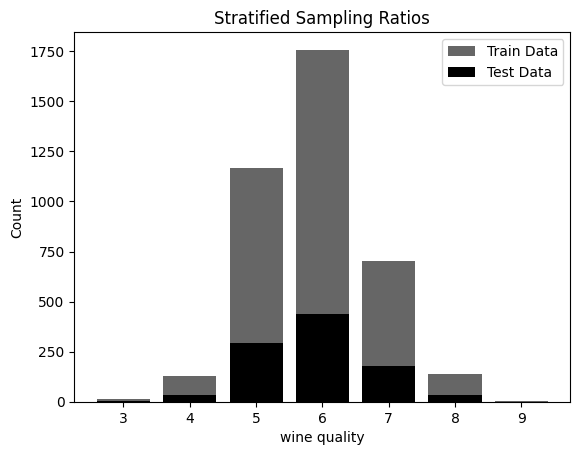

In [7]:
# 统计训练集和测试集中每个类别的样本数量
train_class_counts = {label: list(train_y).count(label) for label in set(train_y)}
test_class_counts = {label: list(test_y).count(label) for label in set(test_y)}
plt.bar(train_class_counts.keys(), train_class_counts.values(), color='k', alpha=0.6, label='Train Data')
plt.bar(test_class_counts.keys(), test_class_counts.values(), color='k',label='Test Data')
plt.xlabel('wine quality')
plt.ylabel('Count')
plt.title('Stratified Sampling Ratios')
plt.legend()
plt.show()

在上图中可以看出我们成功按照类别分层抽样，并且每一个类别中训练集和测试集比例都近似为4：1，验证成功。

### Linear Regression构建
- 损失函数：
  - MSE：$$Loss=\frac{1}{N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2$$
  有的资料上损失函数多了个$\frac{1}{2}$：
  $$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2$$
  目的是求导后将二次项的系数变为1，加和不加对结果理论上没有影响。
- 目标：损失函数最小

首先我们要构造损失函数，其中的参数$\pmb{\theta}$实际上就是回归系数，我们在代码中使用权重weight表示。

In [8]:
def calculate_MSE(y, x, weight):
    # 我们此处采用第一种 MSE 定义方式
    loss = np.array([ num*num for num in (y - np.dot(x, weight))]).mean() * 0.5
    return loss


接下来我们真正实现线性回归模型

In [9]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_epochs=3000):

        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None

    def fit(self, X, y, optimization='batch'):
        """
            默认为批量梯度下降
        """
        epsilon = 1e-7  # 阈值，当两次迭代之间的差值小于该阈值时，迭代结束
        N = X.shape[0]
        num_features = X.shape[1]
        self.weights =  np.random.randn(num_features)
        # 初始化均方误差列表
        MSE_list = [calculate_MSE(y, X, self.weights)]

        # 批量梯度下降
        if optimization == 'batch':
            for _ in range(self.num_epochs):  # 终止条件1：迭代步数到达上限
                # 计算梯度
                predictions = np.dot(X, self.weights)
                error = y - predictions
                gradient = np.dot(X.T, error) / N
                # 更新权重
                self.weights += self.learning_rate * gradient
                # 将本轮的均方误差放入列表，用于输出和绘制收敛曲线
                mse = calculate_MSE(y, X, self.weights)
                MSE_list.append(mse)
                if(abs(MSE_list[-2] - MSE_list[-1]) < epsilon):  # 终止条件2：收敛（为了减少不必要的迭代，提高效率）
                    return MSE_list, self.weights
            return MSE_list, self.weights

        # 随机梯度下降
        elif optimization == 'stochastic':
            for _ in range(self.num_epochs):
                for i in range(N):
                    # 计算梯度
                    random_idx = np.random.randint(N)
                    x_i, y_i = X[random_idx,:], y[random_idx]
                    prediction = np.dot(x_i, self.weights)
                    error = y_i - prediction
                    gradient = np.dot(x_i.T, error)
                    # 更新权重
                    self.weights += self.learning_rate * gradient
                    # 将本轮的均方误差放入列表，用于输出和绘制收敛曲线
                    mse = calculate_MSE(y, X, self.weights)
                    MSE_list.append(mse)
                    if(abs(MSE_list[-2] - MSE_list[-1]) < epsilon):  # 终止条件2：收敛（为了减少不必要的迭代，提高效率）
                        return MSE_list, self.weights
            return MSE_list, self.weights

    def predict(self, X):
            return np.dot(X, self.weights)

In [10]:
# 封装函数
def LinearRegression_fun(train_X , train_y, test_X, test_y, learning_rate, optimization):
    LR_BGD = LinearRegression(learning_rate=learning_rate)
    MSE_list, weight = LR_BGD.fit(train_X, train_y, optimization)
    mse_test = calculate_MSE(test_y, test_X, weight)
    mse_train = calculate_MSE(train_y, train_X, weight)
    if optimization=="batch":
        print('==================批量梯度下降=================')
    elif optimization=="stochastic":
        print('==================随机梯度下降=================')
    print('学习率:',learning_rate)
    print('测试集均方误差:', mse_test)
    print('训练集均方误差:', mse_train)
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    k = [x for x in range(len(MSE_list))]

    if optimization=="batch":
        plt.plot(k, MSE_list, color='red')
    elif optimization=="stochastic":
        plt.plot(k, MSE_list, color='blue')
    
    plt.xlabel('epoch')
    plt.ylabel('MSE')
    if optimization=="batch":
        plt.title("All epoches for BGD")
    elif optimization=="stochastic":
        plt.title("All epoches for SGD")
    return mse_test, mse_train, MSE_list

==================批量梯度下降=================
学习率: 0.0001
测试集均方误差: 9.044671283234281
训练集均方误差: 9.077085134059478
==================随机梯度下降=================
学习率: 0.0001
测试集均方误差: 6.452104505060242
训练集均方误差: 6.548617737767685


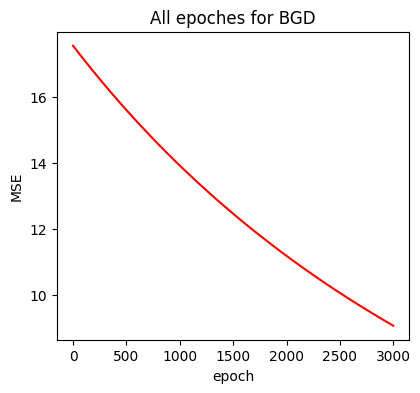

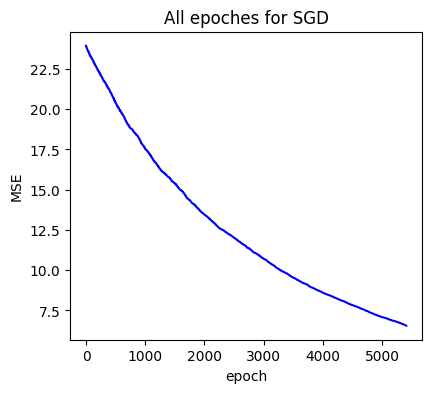

In [11]:
mse_test_BGD1, mse_train_BGD1, MSE_list_BGD1 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.0001, "batch")
mse_test_SGD1, mse_train_SGD1, MSE_list_SGD1 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.0001, "stochastic")

==================批量梯度下降=================
学习率: 0.0005
测试集均方误差: 1.772164602488302
训练集均方误差: 1.813328568378885
==================随机梯度下降=================
学习率: 0.0005
测试集均方误差: 1.1586681136160846
训练集均方误差: 1.1472628592183212


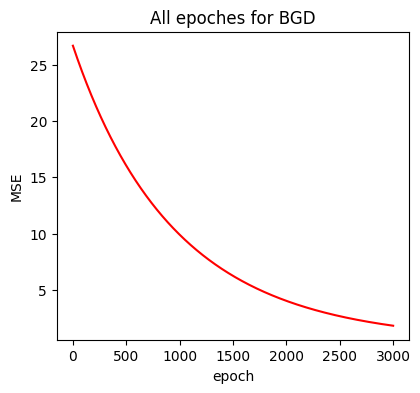

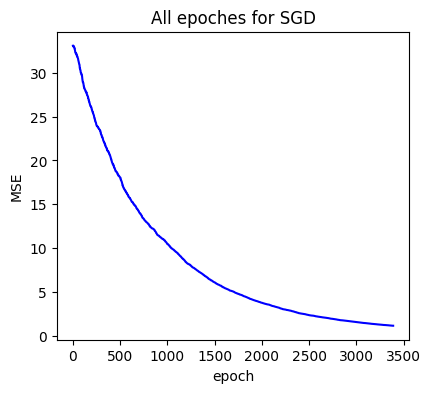

In [12]:
mse_test_BGD2, mse_train_BGD2, MSE_list_BGD2 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.0005, "batch")
mse_test_SGD2, mse_train_SGD2, MSE_list_SGD2 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.0005, "stochastic")

==================批量梯度下降=================
学习率: 0.001
测试集均方误差: 0.45967630431441225
训练集均方误差: 0.46336786438874794
==================随机梯度下降=================
学习率: 0.001
测试集均方误差: 0.3309113340834144
训练集均方误差: 0.3215864415434934


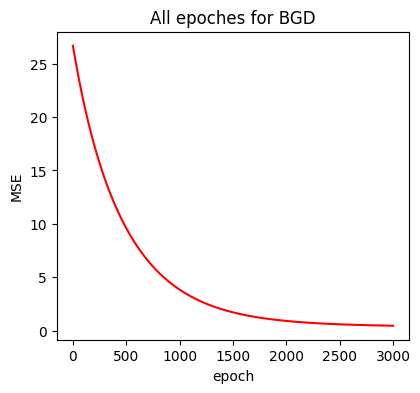

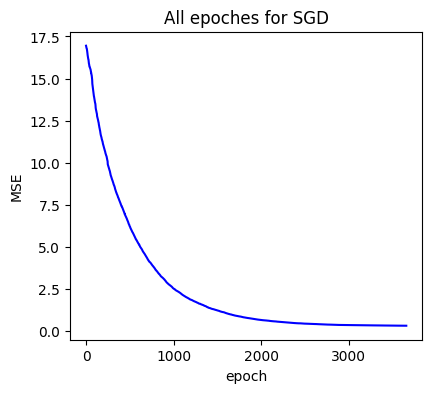

In [13]:
mse_test_BGD3, mse_train_BGD3, MSE_list_BGD3 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.001, "batch")
mse_test_SGD3, mse_train_SGD3, MSE_list_SGD3 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.001, "stochastic")

==================批量梯度下降=================
学习率: 0.005
测试集均方误差: 0.3105619834187939
训练集均方误差: 0.3104521557292612
==================随机梯度下降=================
学习率: 0.005
测试集均方误差: 0.29461177205636374
训练集均方误差: 0.29099148698473426


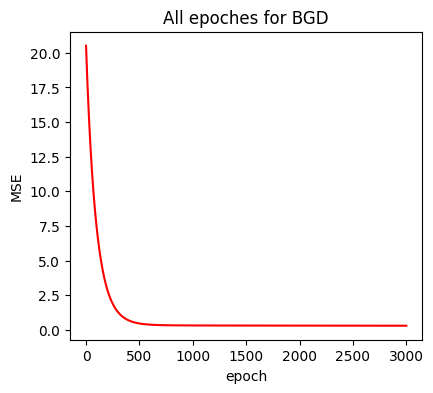

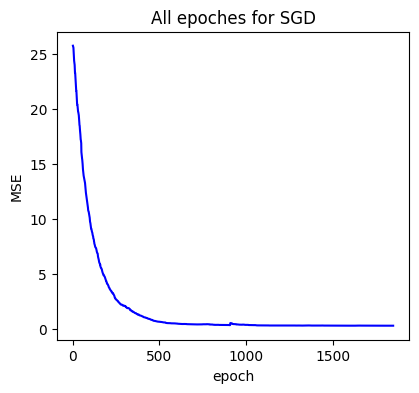

In [14]:
mse_test_BGD4, mse_train_BGD4, MSE_list_BGD4 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.005, "batch")
mse_test_SGD4, mse_train_SGD4, MSE_list_SGD4 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.005, "stochastic")

==================批量梯度下降=================
学习率: 0.01
测试集均方误差: 0.2885804565361081
训练集均方误差: 0.2839866168376265
==================随机梯度下降=================
学习率: 0.01
测试集均方误差: 0.327764077031402
训练集均方误差: 0.3169280441596161


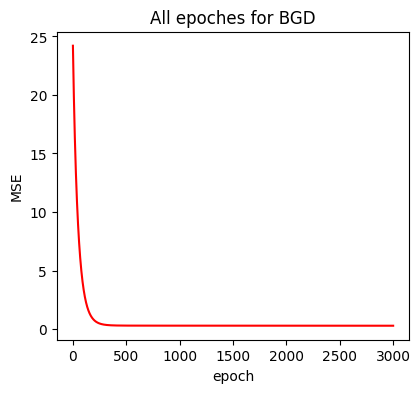

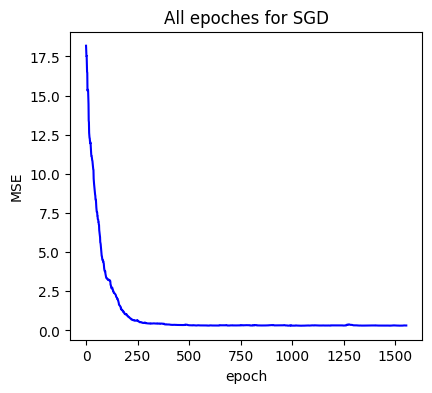

In [15]:
mse_test_BGD5, mse_train_BGD5, MSE_list_BGD5 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.01, "batch")
mse_test_SGD5, mse_train_SGD5, MSE_list_SGD5 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.01, "stochastic")

==================批量梯度下降=================
学习率: 0.02
测试集均方误差: 0.28861206995738337
训练集均方误差: 0.2816556927134223
==================随机梯度下降=================
学习率: 0.02
测试集均方误差: 0.3324180125150896
训练集均方误差: 0.3500978818258793


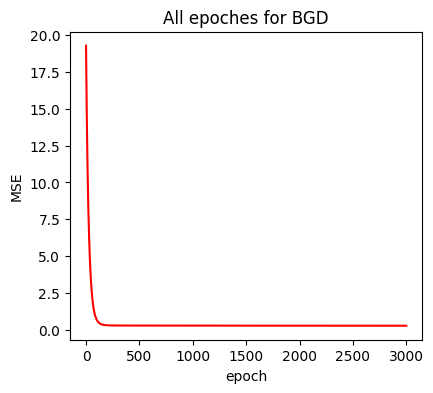

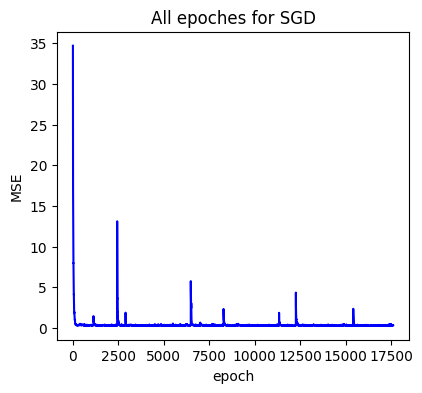

In [16]:
mse_test_BGD6, mse_train_BGD6, MSE_list_BGD6 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.02, "batch")
mse_test_SGD6, mse_train_SGD6, MSE_list_SGD6 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.02, "stochastic")

==================批量梯度下降=================
学习率: 0.03
测试集均方误差: 0.28771546530417946
训练集均方误差: 0.2807598164760616
==================随机梯度下降=================
学习率: 0.03
测试集均方误差: 0.33570110362249367
训练集均方误差: 0.34590998199486717


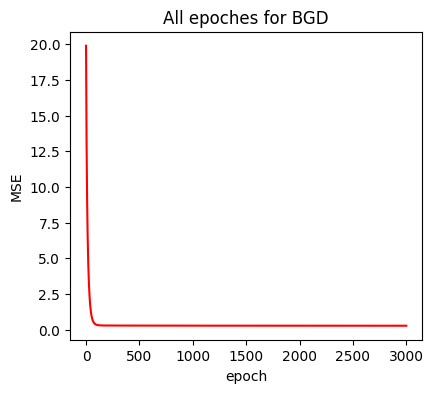

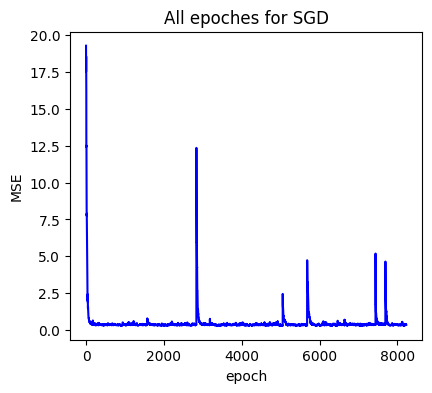

In [17]:
mse_test_BGD7, mse_train_BGD7, MSE_list_BGD7 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.03, "batch")
mse_test_SGD7, mse_train_SGD7, MSE_list_SGD7 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.03, "stochastic")

==================批量梯度下降=================
学习率: 0.04
测试集均方误差: 0.2874357824664507
训练集均方误差: 0.2805407611490961
==================随机梯度下降=================
学习率: 0.04
测试集均方误差: 0.3513145560385803
训练集均方误差: 0.3639112004736154


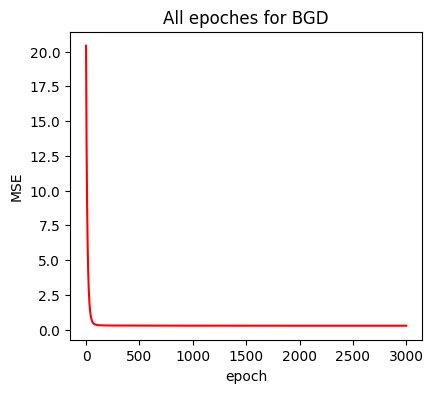

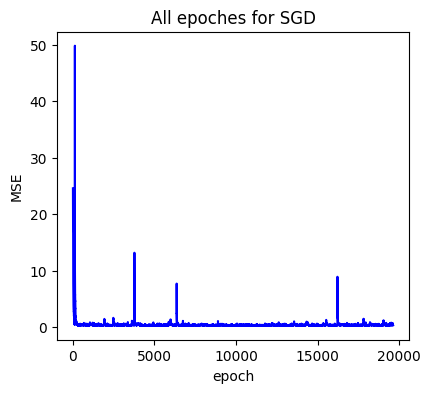

In [18]:
mse_test_BGD8, mse_train_BGD8, MSE_list_BGD8 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.04, "batch")
mse_test_SGD8, mse_train_SGD8, MSE_list_SGD8 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.04, "stochastic")

==================批量梯度下降=================
学习率: 0.05
测试集均方误差: 0.2870989983298024
训练集均方误差: 0.28047658620026505
==================随机梯度下降=================
学习率: 0.05
测试集均方误差: 0.37959468780220407
训练集均方误差: 0.41023626118193646


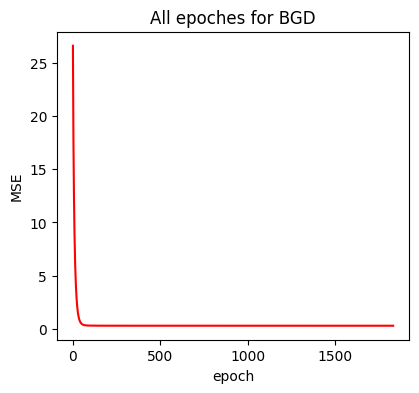

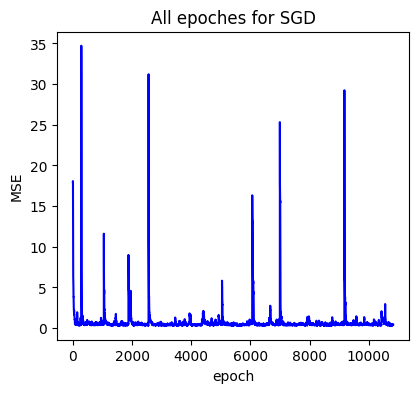

In [19]:
mse_test_BGD9, mse_train_BGD9, MSE_list_BGD9 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.05, "batch")
mse_test_SGD9, mse_train_SGD9, MSE_list_SGD9 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.05, "stochastic")

==================批量梯度下降=================
学习率: 0.1
测试集均方误差: 0.2871173161781391
训练集均方误差: 0.28045396299075503
==================随机梯度下降=================
学习率: 0.1
测试集均方误差: 1.2609867957240188
训练集均方误差: 1.5121185259976335


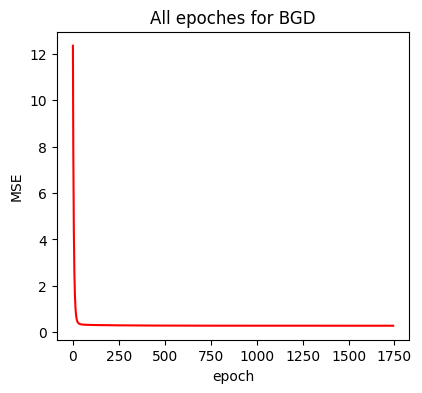

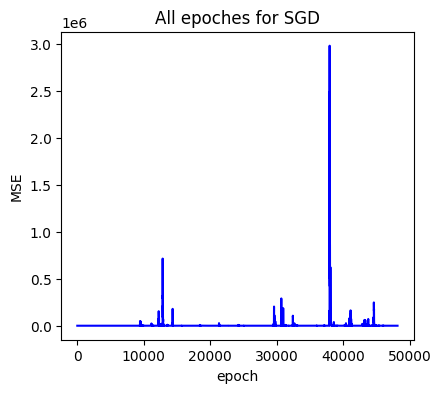

In [20]:
mse_test_BGD10, mse_train_BGD10, MSE_list_BGD10 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.1, "batch")
mse_test_SGD10, mse_train_SGD10, MSE_list_SGD10 = LinearRegression_fun(train_X , train_y, test_X, test_y, 0.1, "stochastic")

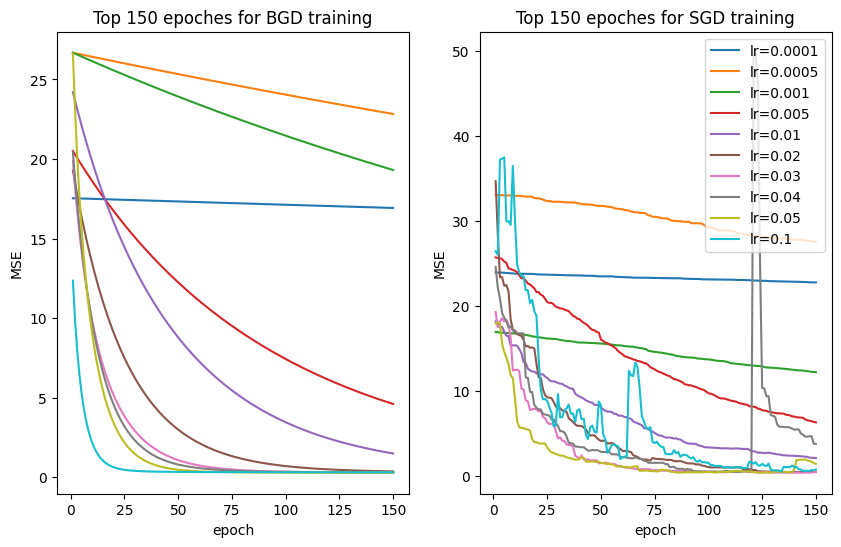

In [21]:
# 采用不同的学习率并进行MSE曲线展示
# 我们对不同的学习率进行对比 0.0001、0.0005、0.001、0.005、0.01、0.02、0.03、0.04、0.05、0.1
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
k = [x for x in range(1, 151)]
plt.plot(k, MSE_list_BGD1[0:150], label='lr=0.0001')
plt.plot(k, MSE_list_BGD2[0:150], label='lr=0.0005')
plt.plot(k, MSE_list_BGD3[0:150], label='lr=0.001')
plt.plot(k, MSE_list_BGD4[0:150], label='lr=0.005')
plt.plot(k, MSE_list_BGD5[0:150], label='lr=0.01')
plt.plot(k, MSE_list_BGD6[0:150], label='lr=0.02')
plt.plot(k, MSE_list_BGD7[0:150], label='lr=0.03')
plt.plot(k, MSE_list_BGD8[0:150], label='lr=0.04')
plt.plot(k, MSE_list_BGD9[0:150], label='lr=0.05')
plt.plot(k, MSE_list_BGD10[0:150], label='lr=0.1')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title("Top 150 epoches for BGD training")
plt.subplot(1,2,2)
plt.plot(k, MSE_list_SGD1[0:150], label='lr=0.0001')
plt.plot(k, MSE_list_SGD2[0:150], label='lr=0.0005')
plt.plot(k, MSE_list_SGD3[0:150], label='lr=0.001')
plt.plot(k, MSE_list_SGD4[0:150], label='lr=0.005')
plt.plot(k, MSE_list_SGD5[0:150], label='lr=0.01')
plt.plot(k, MSE_list_SGD6[0:150], label='lr=0.02')
plt.plot(k, MSE_list_SGD7[0:150], label='lr=0.03')
plt.plot(k, MSE_list_SGD8[0:150], label='lr=0.04')
plt.plot(k, MSE_list_SGD9[0:150], label='lr=0.05')
plt.plot(k, MSE_list_SGD10[0:150], label='lr=0.1')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title("Top 150 epoches for SGD training")
plt.legend()
plt.show()

### 基础要求结果分析
综合分析上述实验结果：
* 学习率越高，MSE下降速度越快；学习率越低，MSE下降速度越缓；
* 随机梯度下降在训练时每轮迭代的MSE处于不稳定的波动状态；
* 批量梯度下降在每次迭代时，MSE越来越小；
* 当学习率很高时，由于随机梯度下降每次使用的样本不确定，其MSE不稳定的波动状态越明显，越难收敛，导致上面大幅度波动情况。

最终认定最佳的学习率介于 0.005~0.01 之间。

## 中级要求
探究回归模型在机器学习和统计学上的差异。

回归模型在机器学习和统计学领域中的应用虽然有很多相似之处，但它们在实际应用中具有本质的区别。下面是回归模型在这两个领域的差异：

1. **目标和侧重点**:

   - 机器学习：在机器学习中，回归模型通常用于预测或估计一个输出变量（目标）与多个输入变量之间的关系，以便进行预测、分类或决策。机器学习更侧重于通过大量数据训练模型，使其具有泛化能力，即对新数据的适应能力。
   
   - 统计学：在统计学中，回归模型用于了解变量之间的因果关系、相关性或影响。统计分析通常着重于理解数据的生成过程、探索数据中的模式、检验假设以及提供关于参数估计和置信区间等统计推断的信息。


2. **模型目标**:

   - 机器学习：在机器学习中，回归模型的目标通常是通过优化算法（如梯度下降）拟合一个函数，以最小化预测误差，例如均方误差。模型的目标是产生最佳预测效果，通常不关心参数的解释性。
   
   - 统计学：在统计学中，回归模型通常用于推断参数估计的显著性、探讨因果关系或模型参数的解释。模型的目标是理解数据背后的统计性质，以便做出统计推断。

3. **特征选择**:

   - 机器学习：特征选择在机器学习中通常是一个重要的预处理步骤，目的是从大量的特征中选择最相关的特征，以提高模型的泛化性能。
   
   - 统计学：统计分析中通常更关注特征的解释性和关系，较少进行特征选择，因为它的目标是推断参数的意义。

4. **模型复杂性**:

   - 机器学习：机器学习中的回归模型可以非常复杂，如深度神经网络，以捕捉数据中的复杂模式。
   
   - 统计学：统计回归模型通常更加简单，如线性回归，以便进行参数估计和统计推断。

5. **评估方法**:

   - 机器学习：机器学习通常使用交叉验证、ROC曲线、准确率、召回率等指标来评估模型性能，强调预测准确性。
   
   - 统计学：统计学通常使用假设检验、p值、置信区间等统计推断方法来评估模型参数的显著性，强调参数估计的可信度。

总的来说，机器学习和统计学都使用回归模型，但其应用背景、目标和方法略有不同。机器学习更侧重于预测和分类，统计学更侧重于参数估计和推断。了解这些差异有助于更好地选择适当的方法来解决特定问题。

## 高级要求
线性回归函数的解析解：
  - 一元：分别对MSE中的$\theta_0, \theta_1$求偏导
  
  - 多元：对MSE中的$\pmb{\theta}$求偏导
  $\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$

我们已经使用了梯度下降的方法来优化，接下来我们要实现岭回归（Ridge Regression）的解析解方式，首先我们来看看什么是岭回归。  
在多元回归中，特征之间会出现多重共线问题，使用最小二乘法估计系数会出现系数不稳定问题，缺乏稳定性和可靠性。为了解决上述问题，我们需要将不适定问题转化为适定问题，在矩阵$\pmb{X^TX}$ 的对角线元素上加入一个小的常数值 $\pmb{\lambda}$ ，然后取其逆求得系数，即岭回归估计：
$$\pmb{\theta}=(\pmb{x}^T\pmb{x}+\lambda\pmb{I})^{-1}\pmb{x}^Ty$$
我们假设一共有N个特征向量，对于多元线性回归有m个特征：
- 数据集：
   - 一元：$\{(x^{(i)}, y^{(i)})\}$  
   - 多元：$\{(\pmb{x}^{(i)}, y^{(i)})\},\\ \pmb{x}^{(i)}=[x^{(i)}_1, x^{(i)}_2,..., x^{(i)}_m], i=1,2,...,N$


- 函数：
  - 一元：$f(x^{(i)},\pmb{\theta})=\theta_0+\theta_1x^{(i)}$ 
  - 多元：$f(\pmb{x}^{(i)},\pmb{\theta})=\theta_0+\theta_1x^{(i)}_1+\theta_2x^{(i)}_2 + ... +\theta_mx^{(i)}_m $
  
- 参数：
  - 一元：$\pmb{\theta}=[\theta_0, \theta_1]$
  - 多元：$\pmb{\theta}=[\theta_0, \theta_1,\theta_2, ...,\theta_m]$

In [22]:
def Ridge_regression(train_X , train_y, test_X, test_y, lamda):
    # 首先我们将数据变为矩阵格式
    x = np.mat(train_X)
    y = np.mat(train_y.reshape(-1,1))

    # 我们根据解析解公式计算
    # x_x 表示 x 的转置乘以 x
    x_x = x.T * x
    weight = (x_x + lamda * np.eye(x.shape[1])).I * x.T * y
    weight = np.array(weight).flatten()

    train_MSE = calculate_MSE(train_y, train_X, weight)
    test_MSE = calculate_MSE(test_y, test_X, weight)
    return weight, train_MSE, test_MSE

In [23]:
for lamda in [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5]:
    weight,train_MSE,test_MSE=Ridge_regression(train_X , train_y, test_X, test_y, lamda)
    print('##########基于解析法的岭回归  lamda:{} ##########'.format(str(lamda)))
    print('Train MSE:', train_MSE)
    print('Test MSE:', test_MSE)
    print('\n')


##########基于解析法的岭回归  lamda:0.001 ##########
Train MSE: 0.28043144389970986
Test MSE: 0.2871830377186589


##########基于解析法的岭回归  lamda:0.005 ##########
Train MSE: 0.28043144393496994
Test MSE: 0.2871830810807029


##########基于解析法的岭回归  lamda:0.01 ##########
Train MSE: 0.28043144404515374
Test MSE: 0.28718313534220924


##########基于解析法的岭回归  lamda:0.05 ##########
Train MSE: 0.2804314475702523
Test MSE: 0.2871835717918623


##########基于解析法的岭回归  lamda:0.1 ##########
Train MSE: 0.2804314585822074
Test MSE: 0.2871841232457418


##########基于解析法的岭回归  lamda:0.3 ##########
Train MSE: 0.28043157590764933
Test MSE: 0.2871863944518755


##########基于解析法的岭回归  lamda:0.5 ##########
Train MSE: 0.28043181018727253
Test MSE: 0.2871887701007674


